<a href="https://colab.research.google.com/github/happyrabbit/IntroDataScience/blob/master/Python/Measuring_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from plotnine import *
import sklearn.metrics as metrics
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Regression Model Performance

In [2]:
# load data
sim_dat = pd.read_csv("http://bit.ly/2P5gTw4")
sim_dat.head()


,age,gender,income,house,store_exp,online_exp,store_trans,online_trans,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,segment
0,57,Female,120963.400958,Yes,529.134363,303.512475,2,2,4,2,1,2,1,4,1,4,2,4,Price
1,63,Female,122008.104950,Yes,478.005781,109.529710,4,2,4,1,1,2,1,4,1,4,1,4,Price
2,59,Male,114202.295294,Yes,490.810731,279.249582,7,2,5,2,1,2,1,4,1,4,1,4,Price
3,60,Male,113616.337078,Yes,347.809004,141.669752,10,2,5,2,1,3,1,4,1,4,2,4,Price
4,51,Male,124252.552787,Yes,379.625940,112.237177,4,4,4,1,1,3,1,4,1,4,2,4,Price


In [3]:
# clean data
sim_dat = sim_dat[~sim_dat.income.isnull()]
sim_dat = sim_dat[sim_dat.store_exp >0]
x = sim_dat.loc[:, ['store_exp', 'online_exp', 'store_trans', 'online_trans']]
y = sim_dat.income

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression().fit(x, y)
yhat = reg.predict(x)

We can use `score` to get $R^2$:

In [6]:
reg.score(x, y)

0.601569798163644

It is not difficult to calculate MSE, RMSE, $R^2$,  and adjusted-$R^2$

In [7]:
SS_Residual = sum((y-yhat)**2)  
MSE = ((y-yhat)**2).mean()    
RMSE = math.sqrt(MSE)
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-len(x.columns)-1)

print (MSE, RMSE, r_squared, adjusted_r_squared)

989264153.9923203 31452.56991077709 0.6015697981636442 0.599602241611366


# Classification Model Performance

Let's build a random forest classifier as an example to calculate different model performance measures.

In [8]:
# load data
sim_dat = pd.read_csv("http://bit.ly/2P5gTw4")
sim_dat.head()
train, test = train_test_split(sim_dat, test_size = 0.2, stratify = sim_dat.gender)

# set random seed to make sure reproducibility
np.random.seed(3456)

# initialize the model
rf = RandomForestClassifier(n_estimators = 500, max_features = 4)
train_x = train.filter(regex = "^Q")
train_y = pd.get_dummies(train, columns = ['gender']).gender_Female 

test_x = test.filter(regex = "^Q")
test_y = pd.get_dummies(test, columns = ['gender']).gender_Female
rf_fit = rf.fit(train_x, train_y)
pred_y = rf_fit.predict(test_x)
pred_prob = rf_fit.predict_proba(test_x)

# check some of the predictions
# we have two types of predictions here
# pred_y: predicted response, 1: Female, 0: Male
# pred_prob: indicate the probability that the sample is 1-Female/0-Male

pred_y[:5]
pred_prob[:5]

array([[0.44348668, 0.55651332],
       [0.67152381, 0.32847619],
       [0.68884731, 0.31115269],
       [0.66308283, 0.33691717],
       [0.59063889, 0.40936111]])

Confusion Matrix

In [9]:
# we need to use pred_y to calculate confusion matrix
tn, fp, fn, tp = metrics.confusion_matrix(test_y, pred_y).ravel()
(tn, fp, fn, tp)

(65, 24, 41, 70)

Kappa Statistic



In [10]:
metrics.cohen_kappa_score(test_y, pred_y)

0.35426187164712897

The judgement is "Fair agreement" based on the kappa statistics above. 

ROC and AUC

In [14]:
auc = metrics.roc_auc_score(test_y, pred_prob[:,1])
auc

0.709383540844215

In [33]:
fpr, tpr, _ = metrics.roc_curve(test_y, pred_prob[:,1])

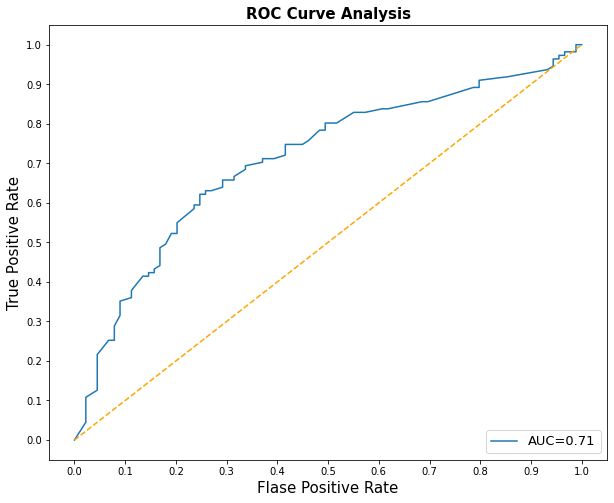

In [34]:
fig = plt.figure(figsize=(10,8))

plt.plot(fpr.tolist(), tpr.tolist(),  label="AUC={:.2f}".format(auc))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()